In [30]:
import pandas as pd
import numpy as np
import plotly.express as px
import statsmodels.api as sm
import plotly.graph_objects as go
import matplotlib.pyplot as plt

In [2]:
#pwt1001 data
df = pd.read_excel(r'D:\6th Semester\ECN447 Growth Economics\COURSEWORK\CourseWork - 1\Data\pwt1001.xlsx', sheet_name = 'Data')

In [3]:
def country_sort():
    country_name = input('Country name: ')
    
    temp = df[df['country'] == country_name].loc[:,['country','year','rgdpe','pop','rgdpna','emp','hc','rnna','rconna','rdana','delta']]
    temp = temp.dropna()
    min_year = min(temp['year'])
    max_year = max(temp['year'])
    
    print(f'ялгаж авах боломжтой жилийн мэдээлэл {min_year} - аас {max_year}')
    
    start = int(input('Starting year: '))
    end = int(input('Ending year: '))
    
    data_sort = df[df['country'] == country_name].loc[:,['country','year','rgdpe','pop','rgdpna','emp','hc','rnna','rconna','rdana','delta']]
    data_sort = data_sort.dropna()
    data_sort['invest'] = data_sort['rdana'] - data_sort['rconna']
    data_sort['invest_per'] = data_sort['invest'] / data_sort['rgdpna']
    
    
    data_sort = data_sort[(data_sort['year'] >= start) & (data_sort['year'] <= end)]
    
    data_sort = data_sort.rename(columns = {'emp':'labour','hc':'human_capital','rgdpna':'production','rnna':'capital'})
       
    return data_sort

In [54]:
def graph():
    df = country_sort()
    
    country_name = list(df['country'].unique())[0]
    start = min(df['year'])
    end = max(df['year'])
    
    title = (f"{country_name}'s production in {start} to {end}")
    
    graph = px.line(df, y = 'production', x = 'year', title = title, markers=True)
    
    
    plt.figure(figsize = (15,8))
    plt.plot(df['year'], df['production'], marker = 'o', label = 'БДНБ')
       
    plt.xlabel('Он')
    plt.ylabel('Бодит дотоодын нийт бүтээгдэхүүн ')
    
    plt.title(f"{country_name}'s production in {start} to {end}")
    plt.legend()
    plt.show()
    
    return graph

In [5]:
def log_data():
    df = country_sort()
    df = df.loc[:,['country','year','production','labour','human_capital','capital']]
    
    df['log_y'] = np.log(df['production'])
    df['log_l'] = np.log(df['labour'])
    df['log_k'] = np.log(df['capital'])
    df['log_h'] = np.log(df['human_capital'])
    
    
    df['log_k/l'] = df['log_k'] - df['log_l']
    df['log_y/l'] = df['log_y'] - df['log_l']
    df['log_h/l'] = df['log_h'] - df['log_l']
    
    df['y/l'] = df['production'] / df['labour']
    
    
    
    #df['product_grow'] = df['production'].pct_change()
    #df = df.fillna(0)
    
    
    df.index = np.arange(1, len(df)+1)
    df = df.reset_index()
    
    #Product trend
    
    #df['gt'] = df['product_grow'] * df['index']
    #df['product_trend'] = np.exp(df['gt'])
    
    #Product trend per labour
    
    #df['production_per'] = df['production'] / df['labour']
    #df['product_per_grow'] = df['production_per'].pct_change()
    #df = df.fillna(0)
    
    #df['gt_per'] = df['product_per_grow'] * df['index']
    #df['product_per_trend'] = np.exp(df['gt_per'])
    
    return df

In [6]:
def trend_per():
    data = log_data()
    y = data[['y/l']]
    x = data[['year']]
    x = sm.add_constant(x)
    
    trend_per = sm.OLS(y,x).fit()
    
    trend_per_fit = trend_per.fittedvalues
    trend_per_df = pd.DataFrame(trend_per_fit, columns = ['trend_per'])
    
    #trend_per_df['log_trend_per'] = np.log(trend_per_df['trend_per'])
    
    #beta1 = trend_per.params[1]
    
    return trend_per_df

In [7]:
def trend():
    data = log_data()
    y = data[['production']]
    x = data[['year']]
    x = sm.add_constant(x)
    
    trend = sm.OLS(y,x).fit()
    
    trend_fit = trend.fittedvalues
    trend_df = pd.DataFrame(trend_fit, columns = ['trend'])
    
    #trend_df['log_trend'] = np.log(trend_df['trend'])
    
    return trend_df

In [8]:
#Энгийн үйлдвэрлэлийн функцын үнэлгээ
def model1():
    data = log_data()
    y = data[['log_y']]
    x = data[['log_k','log_l']]
    x = sm.add_constant(x)
        
    model = sm.OLS(y,x).fit()
    model_sum = model.summary()
    #model_sum = print(f'Энгийн үйлдвэрлэлийн функцын үнэлгээ {model_sum}')
    
    params = pd.DataFrame(model.params, columns = ['Коэффициент'])
    std = pd.DataFrame(model.bse, columns = ['Стандарт алдаа'])
    t_stat = pd.DataFrame(model.tvalues, columns = ['t статистик'])
    p_value = pd.DataFrame(model.pvalues, columns = ['Магадлал'])
    
    print('Энгийн үйлдвэрлэлийн функцын үнэлгээ')
    df = pd.concat([params,std,t_stat,p_value], axis = 1)
    
    return df

In [9]:
#Нэг ажилчинд ноогдохоор тооцсон энгийн үйлдвэрлэлийн функцын үнэлгээ
def model2():
    data = log_data()
    y = data[['log_y/l']]
    x = data[['log_k/l']]
    x = sm.add_constant(x)
    
    model = sm.OLS(y, x).fit()
    model_sum = model.summary()
    #model_sum = print(f'Нэг ажилчинд ноогдохоор тооцсон энгийн үйлдвэрлэлийн функцын үнэлгээ {model_sum}')
    
    params = pd.DataFrame(model.params, columns = ['Коэффициент'])
    std = pd.DataFrame(model.bse, columns = ['Стандарт алдаа'])
    t_stat = pd.DataFrame(model.tvalues, columns = ['t статистик'])
    p_value = pd.DataFrame(model.pvalues, columns = ['Магадлал'])
    
    print('Нэг ажилчинд ноогдохоор тооцсон энгийн үйлдвэрлэлийн функцын үнэлгээ')
    df = pd.concat([params,std,t_stat,p_value], axis = 1)
    
    return df

In [10]:
#Шинжлэх ухаан технологийн дэвшилтэй үйлдвэрлэлийн функцын үнэлгээ
def model3():
    data = log_data()
    
    trend_fit = trend()
    data = pd.concat([data, trend_fit], axis = 1)
    
    y = data[['log_y']]
    x = data[['log_k','log_l','trend']]
    x = sm.add_constant(x)
    
    model = sm.OLS(y,x).fit()
    model_sum = model.summary()
    #model_sum = print(f'ШУТД үйлдвэрлэлийн функцын үнэлгээ {model_sum}')
    
    params = pd.DataFrame(model.params, columns = ['Коэффициент'])
    std = pd.DataFrame(model.bse, columns = ['Стандарт алдаа'])
    t_stat = pd.DataFrame(model.tvalues, columns = ['t статистик'])
    p_value = pd.DataFrame(model.pvalues, columns = ['Магадлал'])
    
    print('Шинжлэх ухаан технологийн дэвшилтэй үйлдвэрлэлийн функцын үнэлгээ')
    df = pd.concat([params,std,t_stat,p_value], axis = 1)
    
    return df

In [11]:
#Нэг ажилчинд ноогдохоор тооцсон Шинжлэх ухаан технологийн дэвшилтэй үйлдвэрлэлийн функцын үнэлгээ
def model4():

    data = log_data()    
    
    trend_per_fit = trend_per()
    
    data = pd.concat([data, trend_per_fit], axis = 1)
    
    y = data[['log_y/l']]
    x = data[['log_k/l', 'trend_per']]
    x = sm.add_constant(x)
    
    model = sm.OLS(y,x).fit()
    #model_sum = model.summary()
    #model_sum = print(f'Нэг ажилчинд ноогдохоор тооцсон ШУТД үйлдвэрлэлийн функцын үнэлгээ {model_sum}')
    
    params = pd.DataFrame(model.params, columns = ['Коэффициент'])
    std = pd.DataFrame(model.bse, columns = ['Стандарт алдаа'])
    t_stat = pd.DataFrame(model.tvalues, columns = ['t статистик'])
    p_value = pd.DataFrame(model.pvalues, columns = ['Магадлал'])
    
    print('Нэг ажилчинд ноогдохоор тооцсон ШУТД, үйлдвэрлэлийн функцын үнэлгээ')
    df = pd.concat([params,std,t_stat,p_value], axis = 1)
    
    return df

In [12]:
## Хүмүн капиталтай үйлдвэрлэлийн функцын үнэлгээ
def model5():
    data = log_data()
    
   
    y = data[['log_y']]
    x = data[['log_k','log_l','log_h']]
    x = sm.add_constant(x)
    
    model = sm.OLS(y,x).fit()
    model_sum = model.summary()
    #model_sum = print(f'Хүмүн капиталтай үйлдвэрлэлийн функцын үнэлгээ {model_sum}')
    
    params = pd.DataFrame(model.params, columns = ['Коэффициент'])
    std = pd.DataFrame(model.bse, columns = ['Стандарт алдаа'])
    t_stat = pd.DataFrame(model.tvalues, columns = ['t статистик'])
    p_value = pd.DataFrame(model.pvalues, columns = ['Магадлал'])
    
    print('Хүмүн капиталтай үйлдвэрлэлийн функцын үнэлгээ')
    df = pd.concat([params,std,t_stat,p_value], axis = 1)
    
    return df

In [13]:
#Нэг ажилчинд ноогдохоор тооцсон хүмүн капиталтай үйлдвэрлэлийн функцын үнэлгээ
def model6():
    data = log_data()
    y = data[['log_y/l']]
    x = data[['log_k/l','log_h/l']]
    x = sm.add_constant(x)
    
    model = sm.OLS(y,x).fit()
    model_sum = model.summary()
    #model_sum = print(f'Нэг ажилчинд ноогдохоор тооцсон хүмүн капиталтай үйлдвэрлэлийн функцын үнэлгээ {model_sum}')
    
    params = pd.DataFrame(model.params, columns = ['Коэффициент'])
    std = pd.DataFrame(model.bse, columns = ['Стандарт алдаа'])
    t_stat = pd.DataFrame(model.tvalues, columns = ['t статистик'])
    p_value = pd.DataFrame(model.pvalues, columns = ['Магадлал'])
    
    print('Нэг ажилчинд ноогдохоор тооцсон хүмүн капиталтай үйлдвэрлэлийн функцын үнэлгээ')
    df = pd.concat([params,std,t_stat,p_value], axis = 1)
    
    return df

In [14]:
#Шинжлэх ухаан технологийн дэвшилтэй хүмүн капиталтай үйлдвэрлэлийн функцын үнэлгээ
def model7():
    data = log_data()
    
    trend_fit = trend()
    data = pd.concat([data, trend_fit], axis = 1)
    
    y = data[['log_y']]
    x = data[['log_k','log_l','log_h','trend']]
    x = sm.add_constant(x)
    
    model = sm.OLS(y,x).fit()
    model_sum = model.summary()
    #model_sum = print(f'ШУТД үйлвэрлэл нэг хүнд ноогдохоор {model_sum}')
    
    params = pd.DataFrame(model.params, columns = ['Коэффициент'])
    std = pd.DataFrame(model.bse, columns = ['Стандарт алдаа'])
    t_stat = pd.DataFrame(model.tvalues, columns = ['t статистик'])
    p_value = pd.DataFrame(model.pvalues, columns = ['Магадлал'])
    
    print('ШУТД, хүмүн капиталтай үйлдвэрлэлийн функцын үнэлгээ')
    df = pd.concat([params,std,t_stat,p_value], axis = 1)
    
    return df

In [15]:
#Нэг ажилчинд ноогдохоор тооцсон шинжлэх ухаан технологийн дэвшилтэй хүмүн капиталтай үйлдвэрлэлийн функцын үнэлгээ
def model8():
    data = log_data()
    
    trend_per_fit = trend_per()
    data = pd.concat([data, trend_per_fit], axis = 1)
    
    y = data[['log_y/l']]
    x = data[['log_k/l','log_h/l','trend_per']]
    x = sm.add_constant(x)
    
    model = sm.OLS(y,x).fit()
    model_sum = model.summary()
    #model_sum = print(f'ШУТД үйлвэрлэл нэг хүнд ноогдохоор {model_sum}')
    
    params = pd.DataFrame(model.params, columns = ['Коэффициент'])
    std = pd.DataFrame(model.bse, columns = ['Стандарт алдаа'])
    t_stat = pd.DataFrame(model.tvalues, columns = ['t статистик'])
    p_value = pd.DataFrame(model.pvalues, columns = ['Магадлал'])
    
    print('Нэг ажилчинд ноогдохоор тооцсон ШУТД, хүмүн капиталтай үйлдвэрлэлийн функцын үнэлгээ') 
    df = pd.concat([params,std,t_stat,p_value], axis = 1)
    
    return df

In [45]:
#Тогтвортой төлөвийн капитал !!!Зөвхөн model4 - ийг үнэлэх үед ажиллана.
def steady():
    #model parameters
    #print('Загварын үнэлгээ')
    model = model4()
    
    #data
    #print('Өгөгдлийн утга тодорхойлох')
    data = country_sort()
    
    #parameters1
    tech = np.exp(model['Коэффициент'].values[0])
    alpha = model['Коэффициент'].values[1]
    
    #parameters2
    x = (model['Коэффициент'].values[2]) / (1-alpha)
    delta = data['delta'].mean()
    s = data['invest_per'].mean()
    n = data['labour'].pct_change().mean()
    
    #parameters3 calculation
    k_hat_ss = ((s * tech) / (n + delta + x)) ** (1 / (1 - alpha))
    
    #random k_hat numbers calculations
    k = k_hat_ss
    k1 = int(k/10)
    k2 = int(k/10+k)
    k3 = int(k/10)

    k_ss_df = pd.DataFrame(range(k1, k2, k3), columns = ['k_hat'])
    
    #1r heseg
    s_and_k =  k_ss_df['k_hat'] ** alpha 
    k_ss_df['s_and_k'] = s * tech * s_and_k
    
    #2r heseg
    n_delta_x = (n + delta + x)
    k_ss_df['n_delta_x'] = k_ss_df['k_hat'] * n_delta_x
    
    
    #Тогтвортой төлөвийн капитал зураглал
    fig = go.Figure()
    
    fig.add_trace(go.Scatter(x=k_ss_df['k_hat'], y=k_ss_df['s_and_k'],
                    mode='lines+markers',
                    name='s*f(k^)'))
    
    fig.add_trace(go.Scatter(x=k_ss_df['k_hat'], y=k_ss_df['n_delta_x'],
                    mode='lines+markers',
                    name='(n+delta+x)*k^'))
    
    fig.update_layout(title=f'Тогтвортой төлөвийн капитал, тэнцвэрт капитал: {k_hat_ss}',
                   xaxis_title='Капитал',
                   yaxis_title=' ')
    graph = fig.show()
    
    plt.figure(figsize = (15,8))
    plt.plot(k_ss_df['k_hat'], k_ss_df['s_and_k'], marker = 'o', label = 's*f(k^)')
    plt.plot(k_ss_df['k_hat'], k_ss_df['n_delta_x'], marker = 'o', label = '(n+delta+x)*k^')
       
    plt.xlabel('Капитал')
    plt.title(f'Тогтвортой төлөвийн капитал, тэнцвэрт капитал: {k_hat_ss}')
    plt.legend()
    plt.show()

    return graph

In [47]:
#Шилжилтийн динамик
#Тогтвортой төлөвийн капитал !!!Зөвхөн model4 - ийг үнэлэх үед ажиллана.
def dynamics():
    #model parameters
    #print('Загварын үнэлгээ')
    model = model4()
    
    #data
    #print('Өгөгдлийн утга тодорхойлох')
    data = country_sort()
    
    #parameters1
    tech = np.exp(model['Коэффициент'].values[0])
    alpha = model['Коэффициент'].values[1]
    
    #parameters2
    x = (model['Коэффициент'].values[2]) / (1-alpha)
    delta = data['delta'].mean()
    s = data['invest_per'].mean()
    n = data['labour'].pct_change().mean()
    
    #parameters3 calculation
    k_hat_ss = ((s * tech) / (n + delta + x)) ** (1 / (1 - alpha))
    
    #random k_hat numbers calculations
    k = k_hat_ss
    k1 = int(k/10)
    k2 = int(k/10+k)
    k3 = int(k/10)

    k_ss_df = pd.DataFrame(range(k1, k2, k3), columns = ['k_hat'])
    
    #1r heseg
    s_and_k =  k_ss_df['k_hat'] ** (alpha - 1)
    k_ss_df['s_and_k'] = s * tech * s_and_k
    
    #2r heseg
    n_delta_x = (n + delta + x)
    k_ss_df['n_delta_x'] = k_ss_df['k_hat'] * n_delta_x
    
    
    #Шилжилтийн динамик
    k_ss_df['n_delta_x_dynamic'] = n_delta_x
    
    fig = go.Figure()
    
    fig.add_trace(go.Scatter(x=k_ss_df['k_hat'], y=k_ss_df['s_and_k'],
                    mode='lines+markers',
                    name='s*f(k^)'))
    
    fig.add_trace(go.Scatter(x=k_ss_df['k_hat'], y=k_ss_df['n_delta_x_dynamic'],
                    mode='lines+markers',
                    name='(n+delta+x)'))
    
    fig.update_layout(title=f'Шилжилтийн динамик, тэнцвэрт капитал: {k_hat_ss}',
                   xaxis_title='Капитал',
                   yaxis_title=' ')
    graph = fig.show()
    
    
    plt.figure(figsize = (15,8))
    plt.plot(k_ss_df['k_hat'], k_ss_df['s_and_k'], marker = 'o', label = 's*f(k^)')
    plt.plot(k_ss_df['k_hat'], k_ss_df['n_delta_x_dynamic'], marker = 'o', label = '(n+delta+x)')
       
    plt.xlabel('Капитал')
    plt.title(f'Шилжилтийн динамик, тэнцвэрт капитал: {k_hat_ss}')
    plt.legend()
    plt.show()
    
    
    return graph

In [18]:
model1()

Country name: China
ялгаж авах боломжтой жилийн мэдээлэл 1952 - аас 2019
Starting year: 1970
Ending year: 2019
Энгийн үйлдвэрлэлийн функцын үнэлгээ


,Коэффициент,Стандарт алдаа,t статистик,Магадлал
const,3.461297,0.254765,13.586209,6.826696e-18
log_k,0.601347,0.010969,54.821581,2.964961e-44
log_l,0.360292,0.062353,5.778222,5.820903e-07


In [19]:
model2()

Country name: China
ялгаж авах боломжтой жилийн мэдээлэл 1952 - аас 2019
Starting year: 1970
Ending year: 2019
Нэг ажилчинд ноогдохоор тооцсон энгийн үйлдвэрлэлийн функцын үнэлгээ


,Коэффициент,Стандарт алдаа,t статистик,Магадлал
const,3.279602,0.052379,62.613313,1.108006e-47
log_k/l,0.594437,0.005490,108.274833,5.126127e-59


In [20]:
model3()

Country name: China
ялгаж авах боломжтой жилийн мэдээлэл 1952 - аас 2019
Starting year: 1970
Ending year: 2019
Country name: China
ялгаж авах боломжтой жилийн мэдээлэл 1952 - аас 2019
Starting year: 1970
Ending year: 2019
Шинжлэх ухаан технологийн дэвшилтэй үйлдвэрлэлийн функцын үнэлгээ


,Коэффициент,Стандарт алдаа,t статистик,Магадлал
const,-1.732392e+01,4.478774e+00,-3.868006,3.435025e-04
log_k,1.518243e+00,1.975610e-01,7.684930,8.650246e-10
log_l,1.624417e+00,2.770095e-01,5.864119,4.626491e-07
trend,-2.795489e-07,6.016906e-08,-4.646058,2.852492e-05


In [21]:
model4()

Country name: China
ялгаж авах боломжтой жилийн мэдээлэл 1952 - аас 2019
Starting year: 1970
Ending year: 2019
Country name: China
ялгаж авах боломжтой жилийн мэдээлэл 1952 - аас 2019
Starting year: 1970
Ending year: 2019
Нэг ажилчинд ноогдохоор тооцсон ШУТД, үйлдвэрлэлийн функцын үнэлгээ


,Коэффициент,Стандарт алдаа,t статистик,Магадлал
const,3.016034,0.246534,12.233761,3.249827e-16
log_k/l,0.628623,0.031727,19.813589,1.862212e-24
trend_per,-0.000006,0.000006,-1.093970,2.795435e-01


In [22]:
model5()

Country name: China
ялгаж авах боломжтой жилийн мэдээлэл 1952 - аас 2019
Starting year: 1970
Ending year: 2019
Хүмүн капиталтай үйлдвэрлэлийн функцын үнэлгээ


,Коэффициент,Стандарт алдаа,t статистик,Магадлал
const,0.043039,1.098786,0.039170,9.689247e-01
log_k,0.695457,0.031220,22.275991,2.779800e-26
log_l,0.805881,0.151154,5.331517,2.867349e-06
log_h,-1.309047,0.411209,-3.183409,2.610708e-03


In [23]:
model6()

Country name: China
ялгаж авах боломжтой жилийн мэдээлэл 1952 - аас 2019
Starting year: 1970
Ending year: 2019
Нэг ажилчинд ноогдохоор тооцсон хүмүн капиталтай үйлдвэрлэлийн функцын үнэлгээ


,Коэффициент,Стандарт алдаа,t статистик,Магадлал
const,3.348593,0.479279,6.986732,8.561109e-09
log_k/l,0.594871,0.006306,94.326930,3.142903e-55
log_h/l,0.012788,0.088296,0.144833,8.854617e-01


In [24]:
model7()

Country name: China
ялгаж авах боломжтой жилийн мэдээлэл 1952 - аас 2019
Starting year: 1970
Ending year: 2019
Country name: China
ялгаж авах боломжтой жилийн мэдээлэл 1952 - аас 2019
Starting year: 1970
Ending year: 2019
ШУТД, хүмүн капиталтай үйлдвэрлэлийн функцын үнэлгээ


,Коэффициент,Стандарт алдаа,t статистик,Магадлал
const,-1.588878e+01,5.261286e+00,-3.019942,4.156692e-03
log_k,1.443294e+00,2.440677e-01,5.913497,4.195941e-07
log_l,1.585953e+00,2.884396e-01,5.498387,1.722800e-06
log_h,-2.688567e-01,5.062861e-01,-0.531037,5.980046e-01
trend,-2.508049e-07,8.128696e-08,-3.085426,3.470955e-03


In [26]:
model8()

Country name: China
ялгаж авах боломжтой жилийн мэдээлэл 1952 - аас 2019
Starting year: 1970
Ending year: 2019
Country name: China
ялгаж авах боломжтой жилийн мэдээлэл 1952 - аас 2019
Starting year: 1970
Ending year: 2019
Нэг ажилчинд ноогдохоор тооцсон ШУТД, хүмүн капиталтай үйлдвэрлэлийн функцын үнэлгээ


,Коэффициент,Стандарт алдаа,t статистик,Магадлал
const,-6.100147,2.333894,-2.613720,1.206412e-02
log_k/l,0.981062,0.094035,10.432927,1.039274e-13
log_h/l,-1.131180,0.288361,-3.922787,2.899042e-04
trend_per,-0.000078,0.000019,-4.113796,1.592993e-04


Country name: China
ялгаж авах боломжтой жилийн мэдээлэл 1952 - аас 2019
Starting year: 1970
Ending year: 2019
Country name: China
ялгаж авах боломжтой жилийн мэдээлэл 1952 - аас 2019
Starting year: 1970
Ending year: 2019
Нэг ажилчинд ноогдохоор тооцсон ШУТД, үйлдвэрлэлийн функцын үнэлгээ
Country name: China
ялгаж авах боломжтой жилийн мэдээлэл 1952 - аас 2019
Starting year: 1970
Ending year: 2019


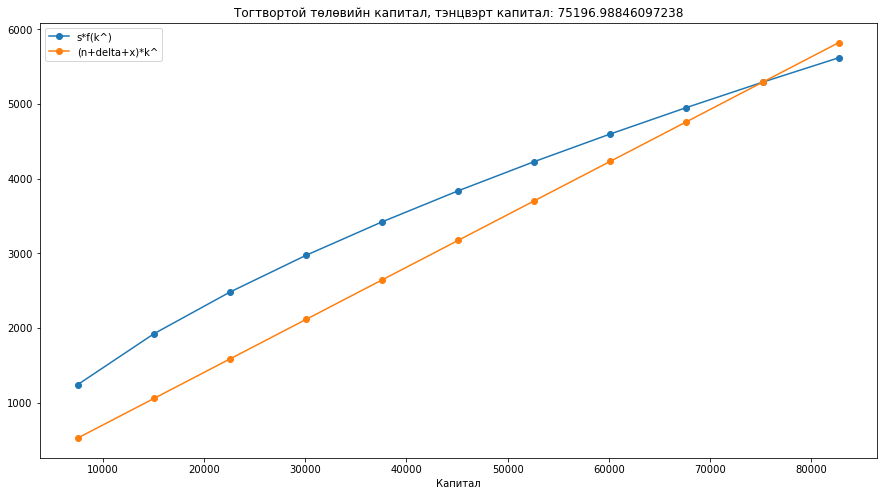

In [56]:
steady()

Country name: China
ялгаж авах боломжтой жилийн мэдээлэл 1952 - аас 2019
Starting year: 1970
Ending year: 2019
Country name: China
ялгаж авах боломжтой жилийн мэдээлэл 1952 - аас 2019
Starting year: 1970
Ending year: 2019
Нэг ажилчинд ноогдохоор тооцсон ШУТД, үйлдвэрлэлийн функцын үнэлгээ
Country name: China
ялгаж авах боломжтой жилийн мэдээлэл 1952 - аас 2019
Starting year: 1970
Ending year: 2019


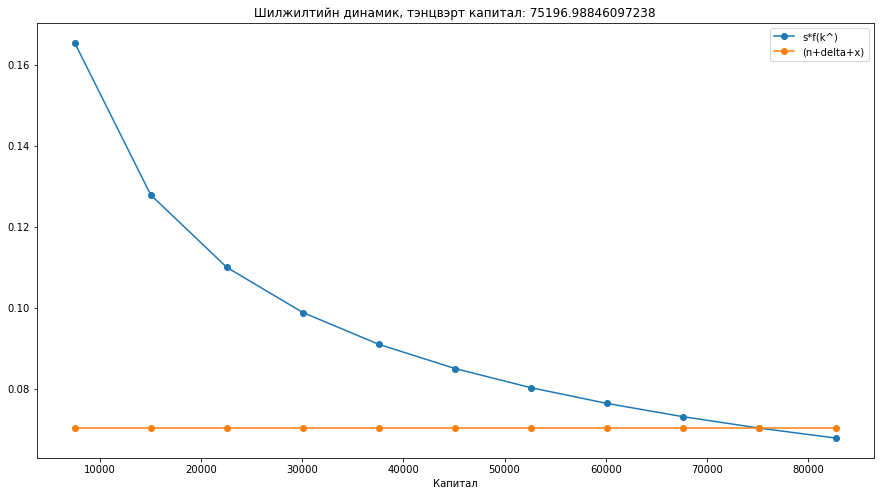

In [48]:
dynamics()

Country name: China
ялгаж авах боломжтой жилийн мэдээлэл 1952 - аас 2019
Starting year: 1970
Ending year: 2019


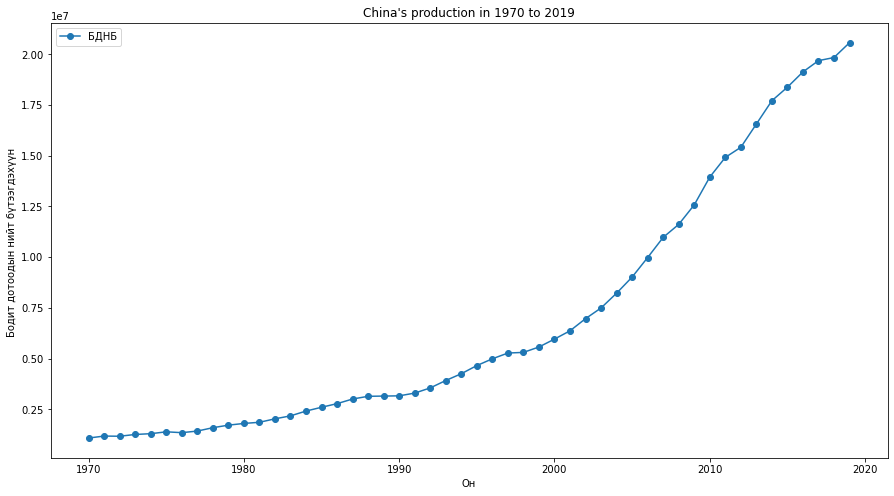

In [55]:
graph()